### Importing necessary libraries

In [25]:
%matplotlib tk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
%matplotlib inline

### Reading and converting the csv dataset to pandas dataframe

In [26]:
df = pd.read_csv('dataset.csv')

In [27]:
df.count()

Unnamed: 0    10320
timestamp     10320
value         10320
dtype: int64

In [28]:
df = df.drop('Unnamed: 0', axis = 1)

In [29]:
df = df.set_index('timestamp')
df.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


<AxesSubplot:xlabel='timestamp'>

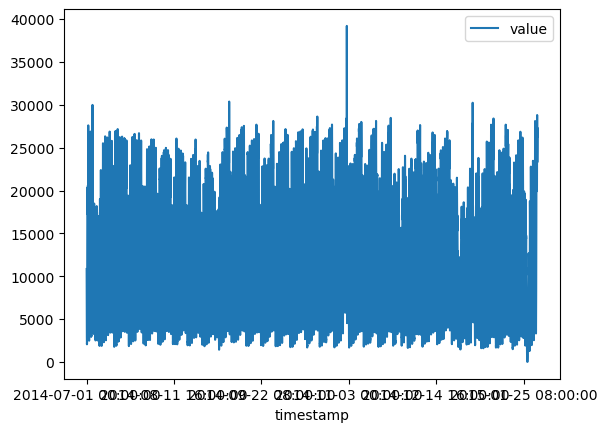

In [30]:
df.plot()

In [31]:
#pip list

In [32]:
lof_dataset = df.copy()
clf = LocalOutlierFactor(n_neighbors=10)
lof_dataset['Anomaly'] = clf.fit_predict(lof_dataset)
anomalies = lof_dataset.query('Anomaly == -1')

Total_percentage = (anomalies['value'].count())/(anomalies['value'].count()+lof_dataset['value'].count())

In [33]:
import plotly.graph_objects as go

b1 = go.Scatter(x=lof_dataset.index.astype(str),
                y=lof_dataset['value'],
                name="Dataset",
                mode='markers'
               )
b2 = go.Scatter(x=anomalies.index.astype(str),
                y=anomalies['value'],
                name="Anomalies",
                mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1))
               )

layout = go.Layout(
    title="Data with anomalies visualization",
    yaxis_title='Sales',
    xaxis_title='Date',
    hovermode='closest'
)

data = [b1, b2]

fig = go.Figure(data=data, layout=layout)
fig.show()

In [34]:
fig.show()

In [35]:
print("Anomalies percentage:", Total_percentage*100)

Anomalies percentage: 0.6163328197226503


In [36]:
anomalies['value'].count()

64